# CSE5311: Numerical Methods for Data Analytics
## Homework 4
### Principal Component Analysis (PCA)

In [44]:
# Import any libraries you may need (e.g. pandas, numpy, seaborn, etc.)
# <insert code here>
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter


In [45]:
# Scikit learn has a bunch of built in datasets.  Hit 'tab' after 'load' and you will see 
# the autocomplete list.  Load the breast cancer data set we worked with in class.
# <insert code here>
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [46]:
# Want to find the best feature reduction that maximizes the variance in the data, i.e. perform PCA.
# Store the data in a pandas data frame.
# <insert code here>
cancer_df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [47]:
# Look at a few rows of the data.
# <insert code here>
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
# Print out the number of rows (data) and columns (features)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [49]:
# Pull the data out of the pandas data frame and assign it to numpy array.
# <insert code here>
cancer_data = cancer_df.iloc[:,:]
cancer_data = cancer_data.values
# cancer_data = np.array(cancer_data)
print(cancer_data.dtype)
print(cancer_data.shape)

float64
(569, 30)


In [50]:
# Normalizing the data set. After normalization, there is no need to mean center the data further.
cancer_df_norm = (cancer_df - cancer_df.mean())/(cancer_df.max() - cancer_df.min())
cancer_df_norm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,0.335139,...,0.324113,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268
1,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,-0.129057,...,0.310239,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282
2,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,-0.059132,...,0.259723,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837
3,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,0.729621,...,-0.048353,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115
4,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,-0.083564,...,0.223081,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001


In [51]:
# Standardize the dataset using the scikit-learn StandardScaler.   Your data should have zero mean and unit standard devication.
# <insert code here>
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer_data)

scaled_data_cancer = scaler.transform(cancer_data)
print(np.shape(scaled_data_cancer))
# Printing of the shape is to keep track of consistency and to avoid errors further down the road.
# print(scaled_data_cancer[0:5,0:8])
# help(scaler.transform)
# print(scaled_data_cancer[0,:])

(569, 30)


In [52]:
# Subtract the mean of each column from each row of the data.  You really shouln't need this as the standard scaler would
# have take care of this for you.  But, it is good practice to learn how to do this.
cancer_data_norm = cancer_df_norm.iloc[:,:]
cancer_data_norm = cancer_data_norm.values
print(np.shape(cancer_data_norm))




(569, 30)


In [53]:
# Form the covariance matrix. Store it in a variable called covMat.
# <insert code here>
covMat = 1/(30-1) * np.dot(cancer_data_norm.T, cancer_data_norm)
print("The shape of the covariance matrix done without numpy module method. ",covMat.shape)
cov_mat = np.cov(scaled_data_cancer.T)
print("The shape of the covariance matrix using numpy module.",np.shape(cov_mat))

The shape of the covariance matrix done without numpy module method.  (30, 30)
The shape of the covariance matrix using numpy module. (30, 30)


In [54]:
# Get the eigenvalues and eigenvectors of the covariance matrix and store them two variables.
eigVal, eigVec = np.linalg.eig(cov_mat) 
print(np.shape(eigVec))
print("Eigenvalues of the covariance matrix: \n",eigVal)

(30, 30)
Eigenvalues of the covariance matrix: 
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


In [55]:
# Get the total number of eigenvalues.
# <insert code here>
print("Size of Eigenvalues vector:",len(eigVal))
print(eigVal.dtype)

Size of Eigenvalues vector: 30
float64


In [71]:
# Check if all the eigenvectors are unit length.  Hint: use np.testing.assert_array_almost_equal on each of eigenvectors.
# <insert code here>

dd = np.dot(eigVec.T,eigVec)
ones_30 = np.ones(30)
print("Checking for the array almost equal to one...\n")

eigvec_unit = []

for q in range(0,30):
    eigvec_unit.append(dd[q,q])
    
if np.testing.assert_almost_equal(ones_30, eigvec_unit) == None:
    print("The dot product of the eigenvectors are all unit length.")
else:
    print("The eigenvectors are not all unit length.")
        


    


Checking for the array almost equal to one...

The dot product of the eigenvectors are all unit length.


In [94]:
# Make a list of (eigenvalue, eigenvector) tuples.
#zip_eig = zip(eigVal, eigVec)
list_eig = [[eigVal[i], eigVec[:,i]] for i in range(len(eigVal))]

list_eig.sort(reverse=True)

# Sort the (eigenvalue, eigenvector) tuples from high to low.
#zip_eig_sort = sorted(zip_eig, key=lambda eigvalue: eigvalue[0], reverse=True)
#list_eig = list(zip_eig_sort)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues, i.e. print out the eigenvalue
print("EigenValues in Descending order:\n")
for eig in list_eig:
    
    print("{0:.4f}".format(eig[0]))




EigenValues in Descending order:

13.3050
5.7014
2.8229
1.9841
1.6516
1.2095
0.6764
0.4775
0.4176
0.3513
0.2944
0.2616
0.2418
0.1573
0.0943
0.0800
0.0595
0.0527
0.0496
0.0312
0.0300
0.0275
0.0244
0.0181
0.0155
0.0082
0.0069
0.0016
0.0008
0.0001


In [91]:
# Calculate the percent variance explained by each eigenvector.  To do this, sum all the eigenvalues and store that number
# in a variable.  Then create a new array where each entry is an eigenvalue divided by the total sum of the eigenvalues.
# Then call np.cumsum to get the cummaltive sum illustrating how much variance is explained by included one additional
# eigenvector in your projection matrix.  Make sure you are using the eigenvalues in sorted (high to low) order.
sum_eigVal = sum(eigVal)

# Create a variable for individual eigenvalue divided by sum of eigenvalue.
individ_eigVal = np.zeros((30)) # This is done for the bar plot to function.

for vv in range(0,30):
    individ_eigVal[vv] = eigVal[vv]/sum_eigVal
    print("Individual variance of each eigenvalue: {0:.4f} ".format(individ_eigVal[vv]))    
    
cumsum_eigVal = np.cumsum(individ_eigVal)


Individual variance of each eigenvalue: 0.4427 
Individual variance of each eigenvalue: 0.1897 
Individual variance of each eigenvalue: 0.0939 
Individual variance of each eigenvalue: 0.0660 
Individual variance of each eigenvalue: 0.0550 
Individual variance of each eigenvalue: 0.0402 
Individual variance of each eigenvalue: 0.0225 
Individual variance of each eigenvalue: 0.0159 
Individual variance of each eigenvalue: 0.0139 
Individual variance of each eigenvalue: 0.0117 
Individual variance of each eigenvalue: 0.0098 
Individual variance of each eigenvalue: 0.0087 
Individual variance of each eigenvalue: 0.0080 
Individual variance of each eigenvalue: 0.0052 
Individual variance of each eigenvalue: 0.0031 
Individual variance of each eigenvalue: 0.0027 
Individual variance of each eigenvalue: 0.0020 
Individual variance of each eigenvalue: 0.0018 
Individual variance of each eigenvalue: 0.0016 
Individual variance of each eigenvalue: 0.0000 
Individual variance of each eigenvalue: 

In [92]:
# Print out the variance explained amount in the cumsum array.
print("The variance for the first cumulative eigenvalue: {0:.4f}%".format(cumsum_eigVal[0]*100))
print("The variance for the second cumulative eigenvalue: {0:.4f}%".format(cumsum_eigVal[1]*100))

The variance for the first cumulative eigenvalue: 44.2720%
The variance for the second cumulative eigenvalue: 63.2432%


In [84]:
# Add projection code here.  Let's reduce the dimensions using the leading two eigenvectors so we
# can compare to our results using scikit-learn exercise we finished in class.  So, make a projection matrix
# with the leading two eigenvectors as columns.  This will be the U matrix we discussed in class and notes.
# After you create the projection matrix, print out its size.  Does it make sense?

eig_vec_project1 = list_eig[0][1]
eig_vec_project2 = list_eig[1][1]

eig_vec_project = np.vstack((eig_vec_project1,eig_vec_project2)).T
print(np.shape(eig_vec_project))

eigVec_projection = np.dot(eig_vec_project,eig_vec_project.T)
print(np.shape(eigVec_projection))

(30, 2)
(30, 30)


(30,)


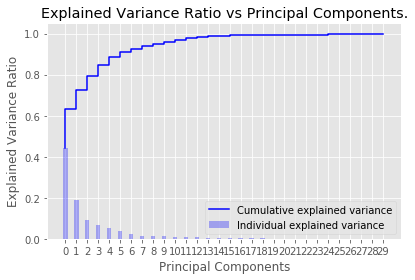

In [85]:

plt.style.use('ggplot')
bar_width = 0.4 # Setting bar_width for bar plot
opacity = 0.3 # Set the opacity of the bar plot 

xx = np.arange(len(eigVal)) # X-axis
print(np.shape(xx))

# Bar plot and step plot.
plt.bar(xx, individ_eigVal, bar_width, color='blue', label='Individual explained variance', alpha=opacity)
plt.step(xx, cumsum_eigVal, color='blue', label='Cumulative explained variance')

plt.legend()
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Principal Components.')
plt.xticks(xx, xx)

plt.tight_layout()
plt.show()


In [77]:
# Project the data using the projection matrix.  This requires us to take the inner product of 
# every 30-dim data point with the each of columns in our projection matrix.
# Note: usually we would stack the eigenvectors as columns in a matrix, say U.  To project we would
# have U'*X' (when X contains data on rows and features as columns) and then we would transpose the
# result to get back a matrix with data on rows and features as columns.  So (U'*X')'=X*U.  'dot' 
# function does matrix multiply or other option is to make it a np.matrix first and then use *.
cancer_data_proj = np.dot(eig_vec_project.T,scaled_data_cancer.T)
print(np.shape(cancer_data_proj))

cancer_data_projection_2D = cancer_data_proj.T
print(np.shape(cancer_data_projection_2D))
print(cancer_data_projection_2D[:,0:2])
cancer['target_names']

(2, 569)
(569, 2)
[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


array(['malignant', 'benign'], dtype='<U9')

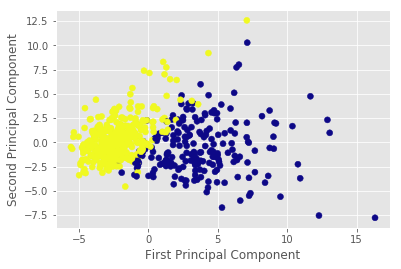

In [78]:
# Visualize the projected data.
plt.style.use('ggplot')
plt.scatter(cancer_data_projection_2D[:,0],cancer_data_projection_2D[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()